# Clustering Basics

**Load necessary packages and apply custom configurations**

In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
# %matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import sklearn as sk

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)
print('Sklearn version', sk.__version__)

Numpy version 1.26.4
Pandas version 2.2.3
Seaborn version 0.13.2
Statsmodels version 0.14.4
Sklearn version 1.6.1


In [2]:
font_size=13
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,4),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size*0.8,
          'ytick.labelsize': font_size*0.8,
          'axes.titlepad': 25}
plt.rcParams.update(params)

## <font color='orange'>Part I: K-means Clustering<font>

### Apply K-mean clustering to dataset 1

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Elbow Method')

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score')

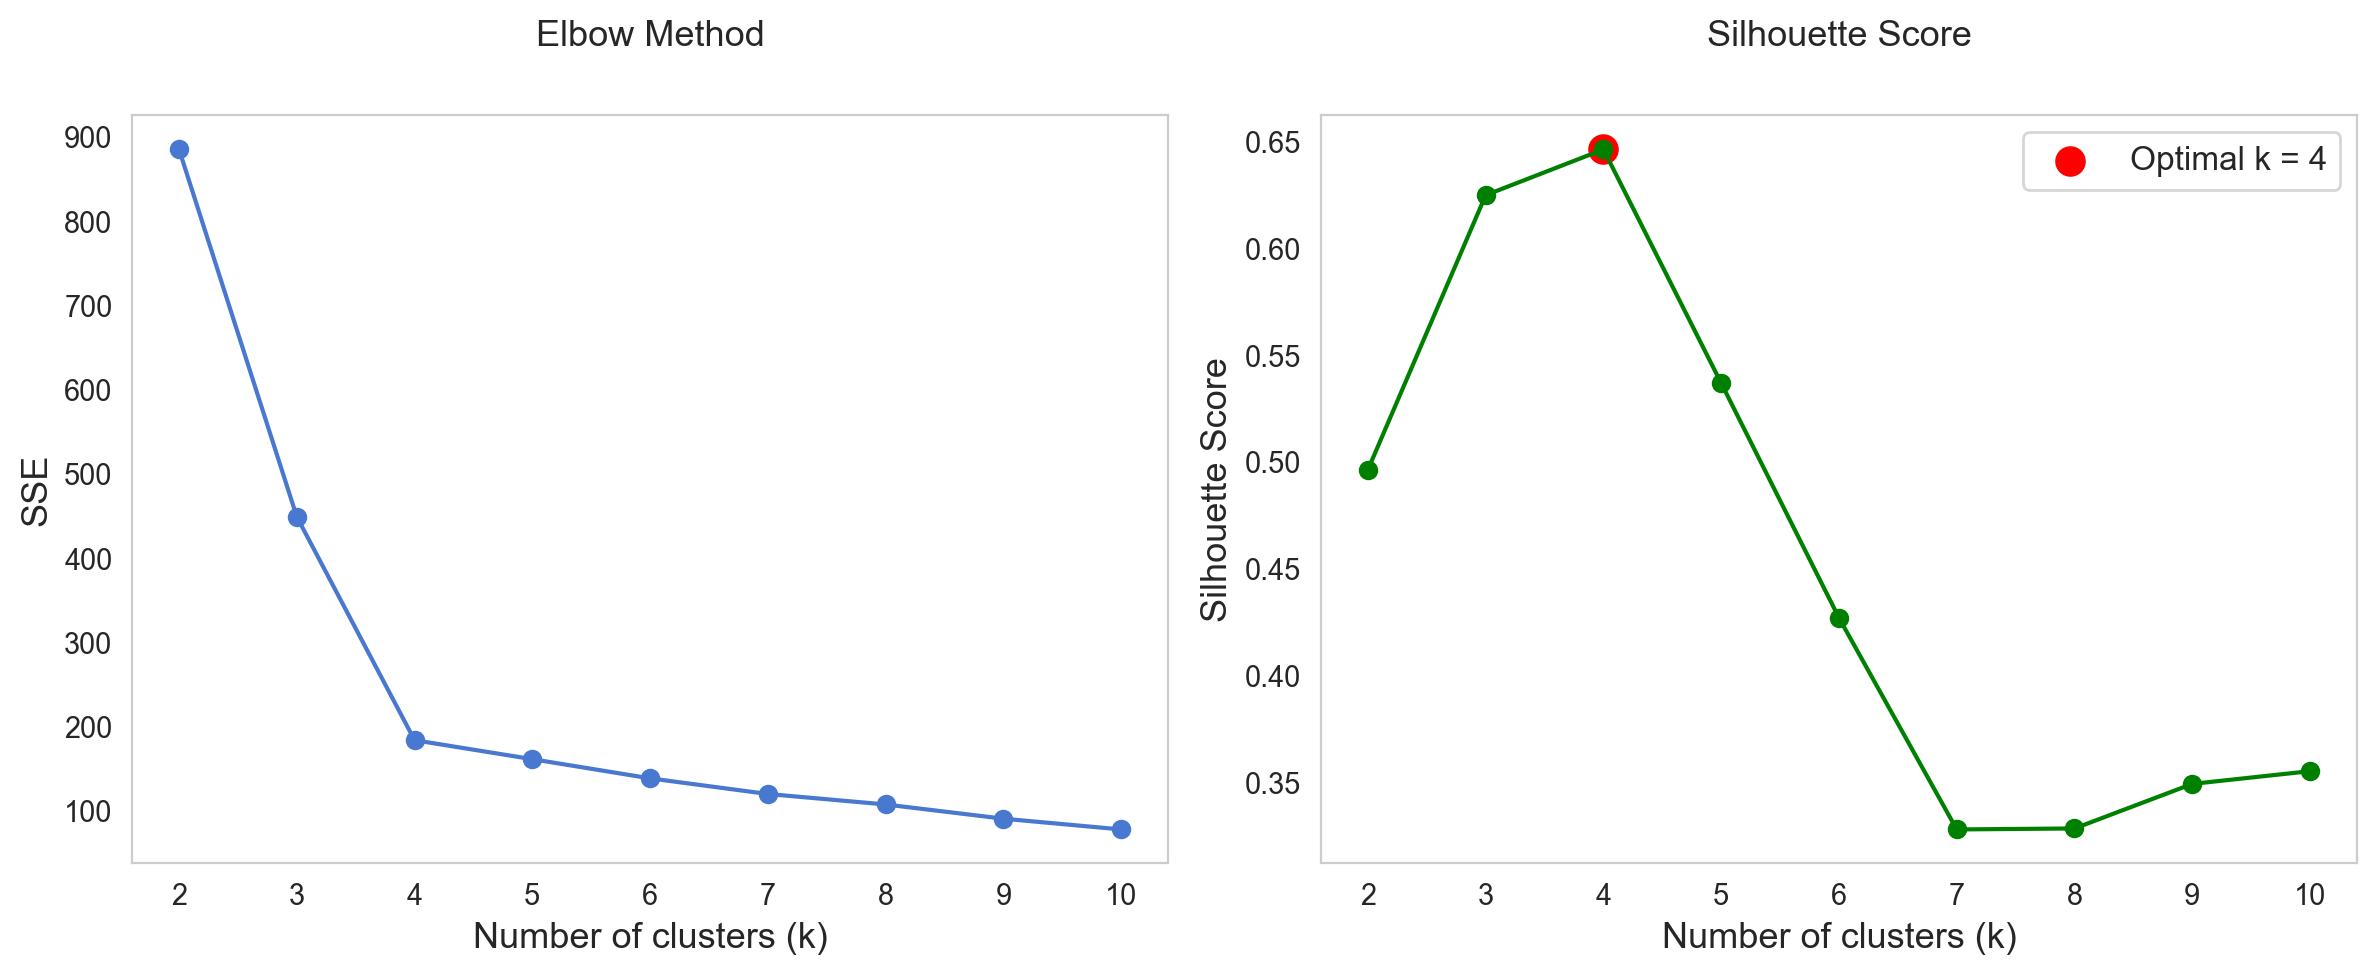

✅ Optimal number of clusters based on silhouette score: 4


In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# โหลดข้อมูล
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset1')
X = data.select_dtypes(include='number')

# คำนวณ SSE และ Silhouette Score
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# หาค่า k ที่เหมาะสมที่สุด
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

# วาด Elbow plot และ Silhouette plot
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.scatter(optimal_k, optimal_score, color='red', s=100, label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 449.611

Centroids : 
[[ 1.066 -0.974]
 [ 1.138  1.057]
 [-1.041 -1.009]]


In [5]:
data['Cluster'] = labels
data.head()


,X1,X2,Cluster
0,-1.180026,-0.750860,2
1,-1.488851,-0.714801,2
2,-0.828153,-0.916925,2
3,0.792955,-0.910485,0
4,-1.988658,-1.318758,2


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

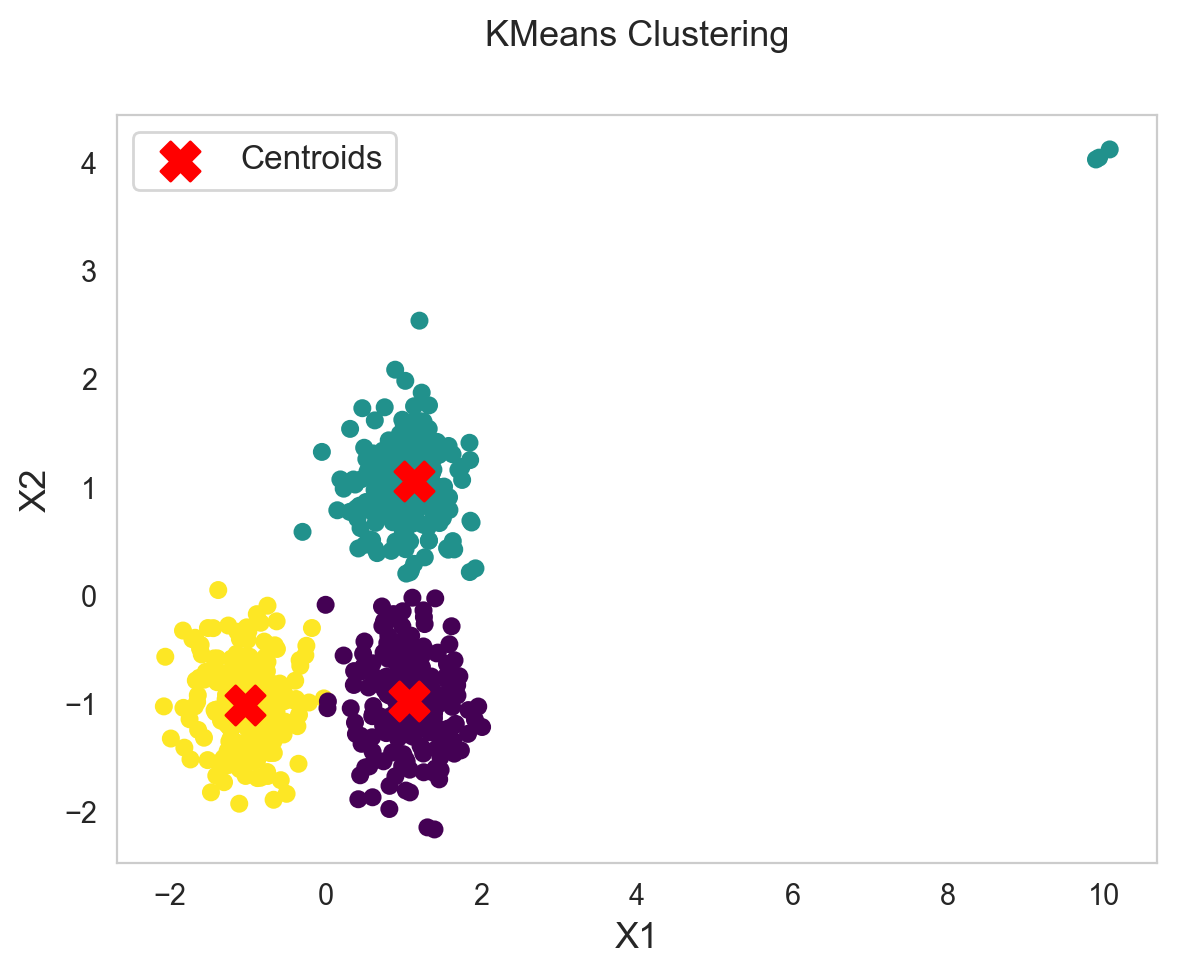

In [6]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 2

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Elbow Method')

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score')

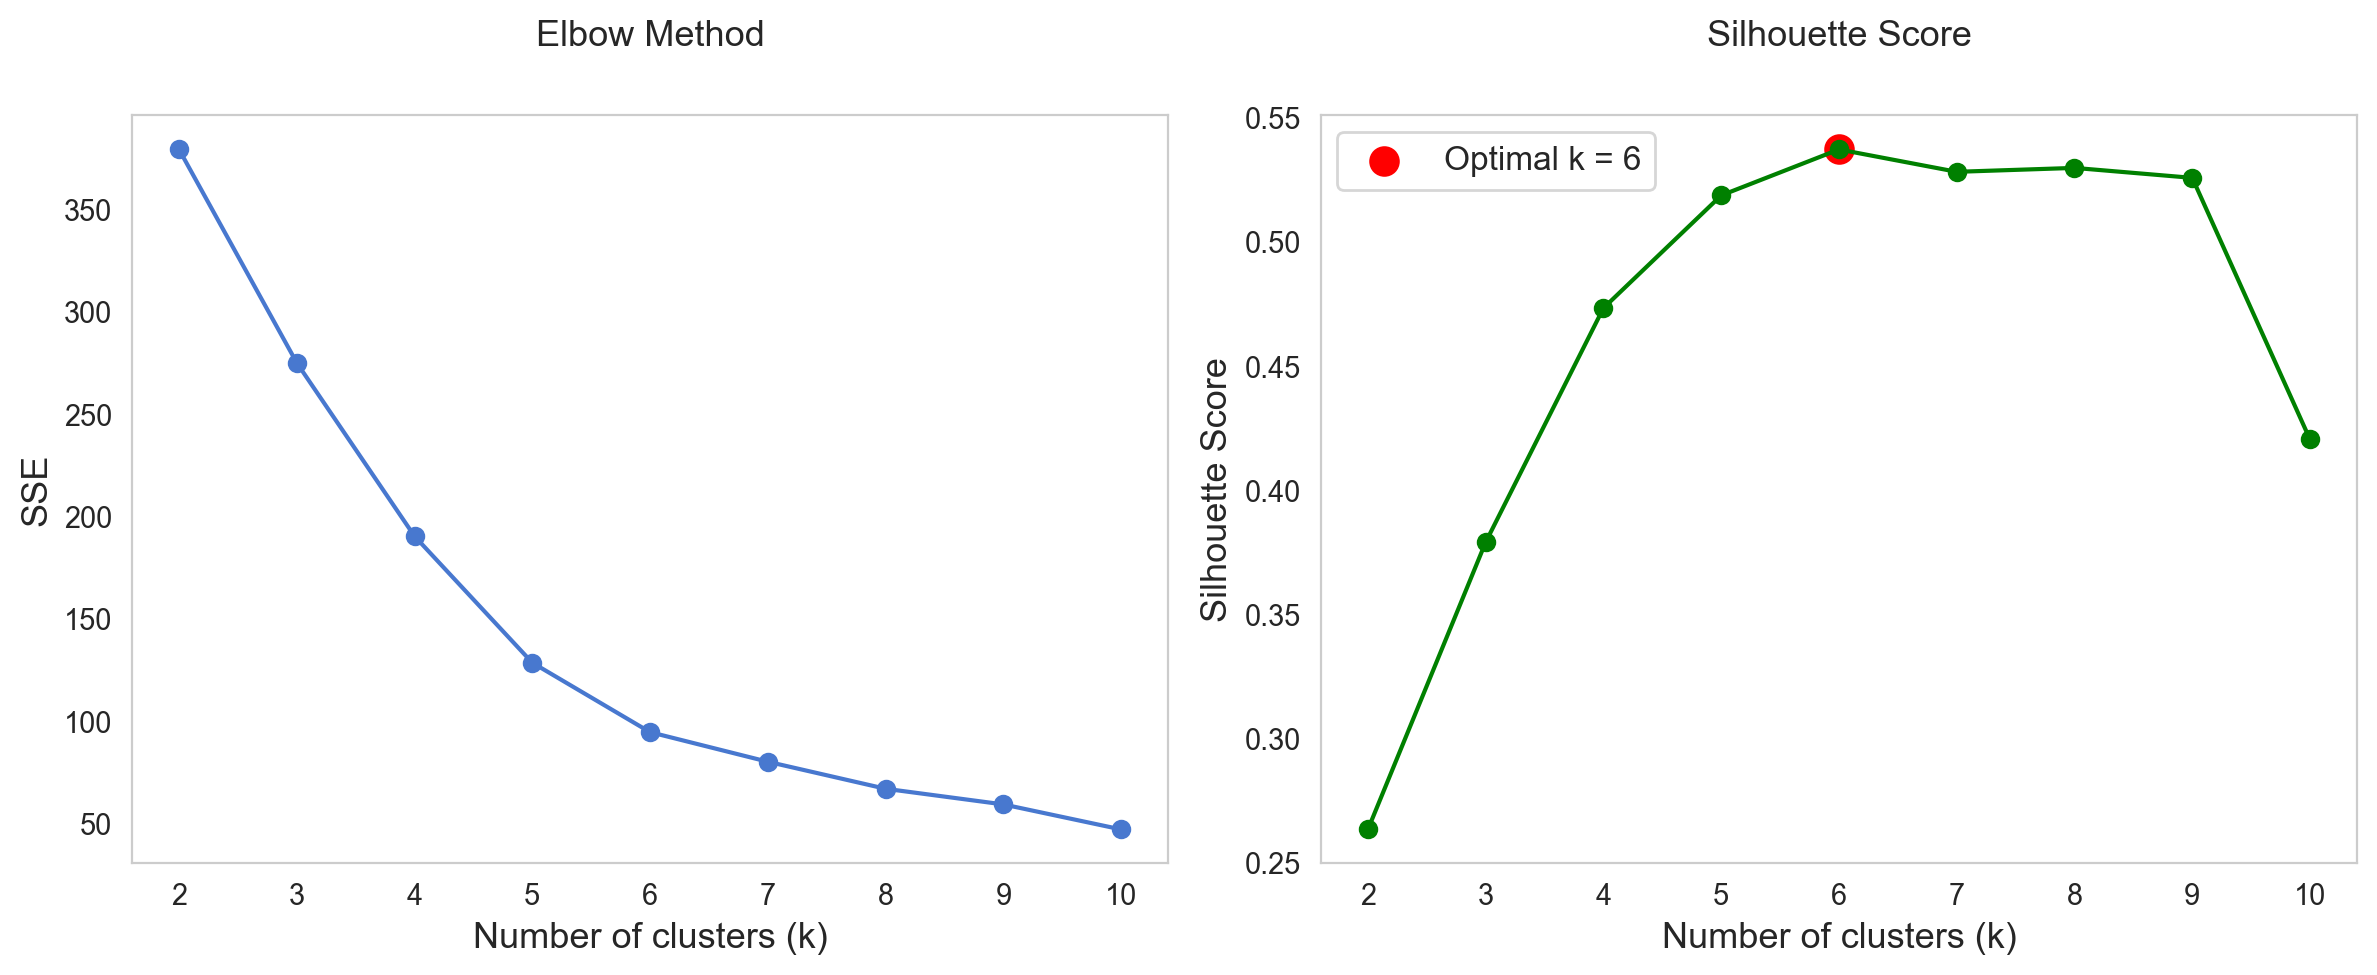

✅ Optimal number of clusters based on silhouette score: 6


In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# โหลดข้อมูล
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset2')
X = data.select_dtypes(include='number')

# คำนวณ SSE และ Silhouette Score
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# หาค่า k ที่เหมาะสมที่สุด
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

# วาด Elbow plot และ Silhouette plot
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.scatter(optimal_k, optimal_score, color='red', s=100, label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=6, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=6, random_state=42)

Sum of squared errors : 94.963

Centroids : 
[[ 8.620e-01 -3.946e-01]
 [-1.173e-03  6.132e-04]
 [-1.105e-01 -9.244e-01]
 [-4.757e-01  8.068e-01]
 [ 6.241e-01  7.072e-01]
 [-9.150e-01 -1.835e-01]]


In [24]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,-0.087696,1.085978,3
1,-0.837558,0.547310,3
2,0.796843,0.411495,4
3,0.212158,0.106985,1
4,-0.053684,0.979634,3


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

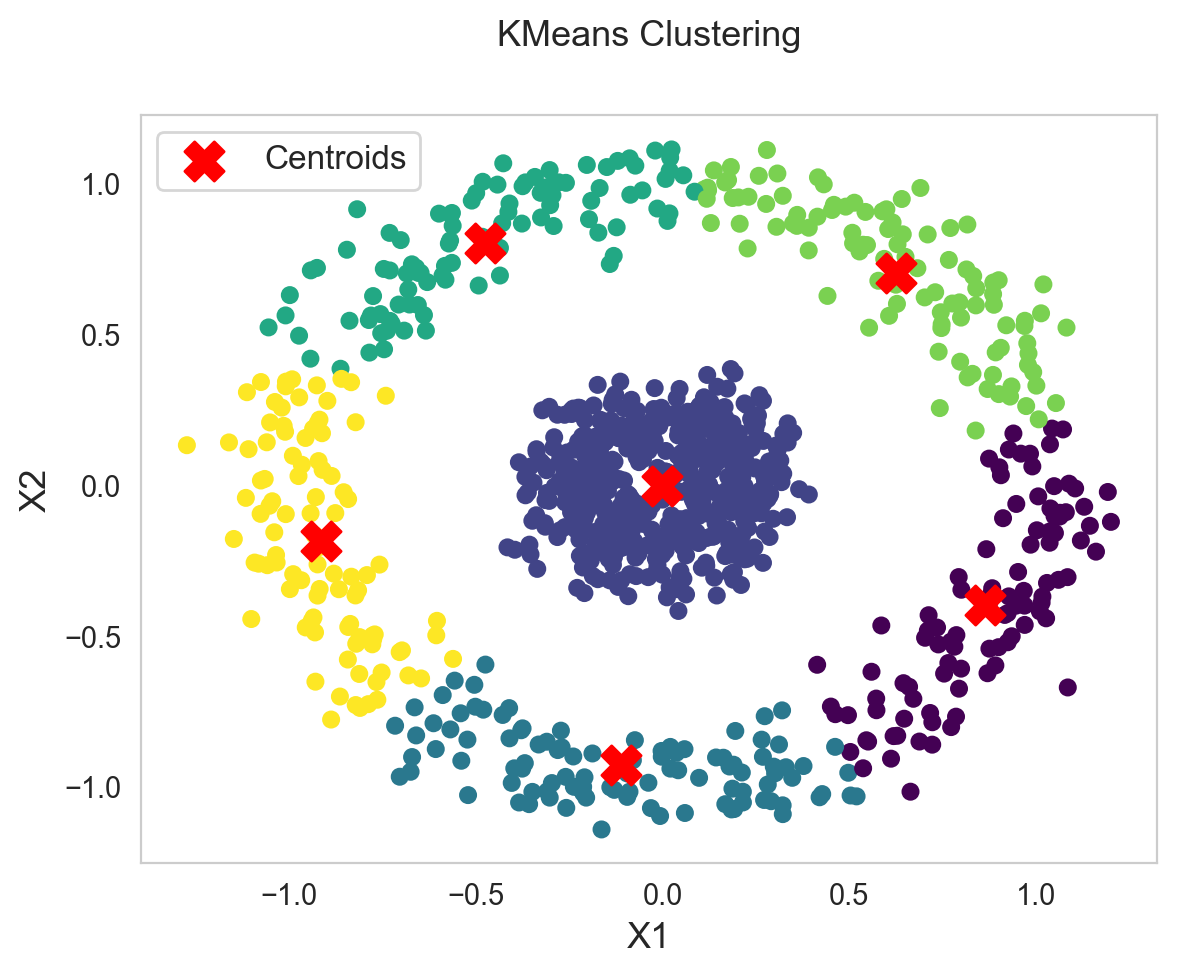

In [25]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 3

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Elbow Method')

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score')

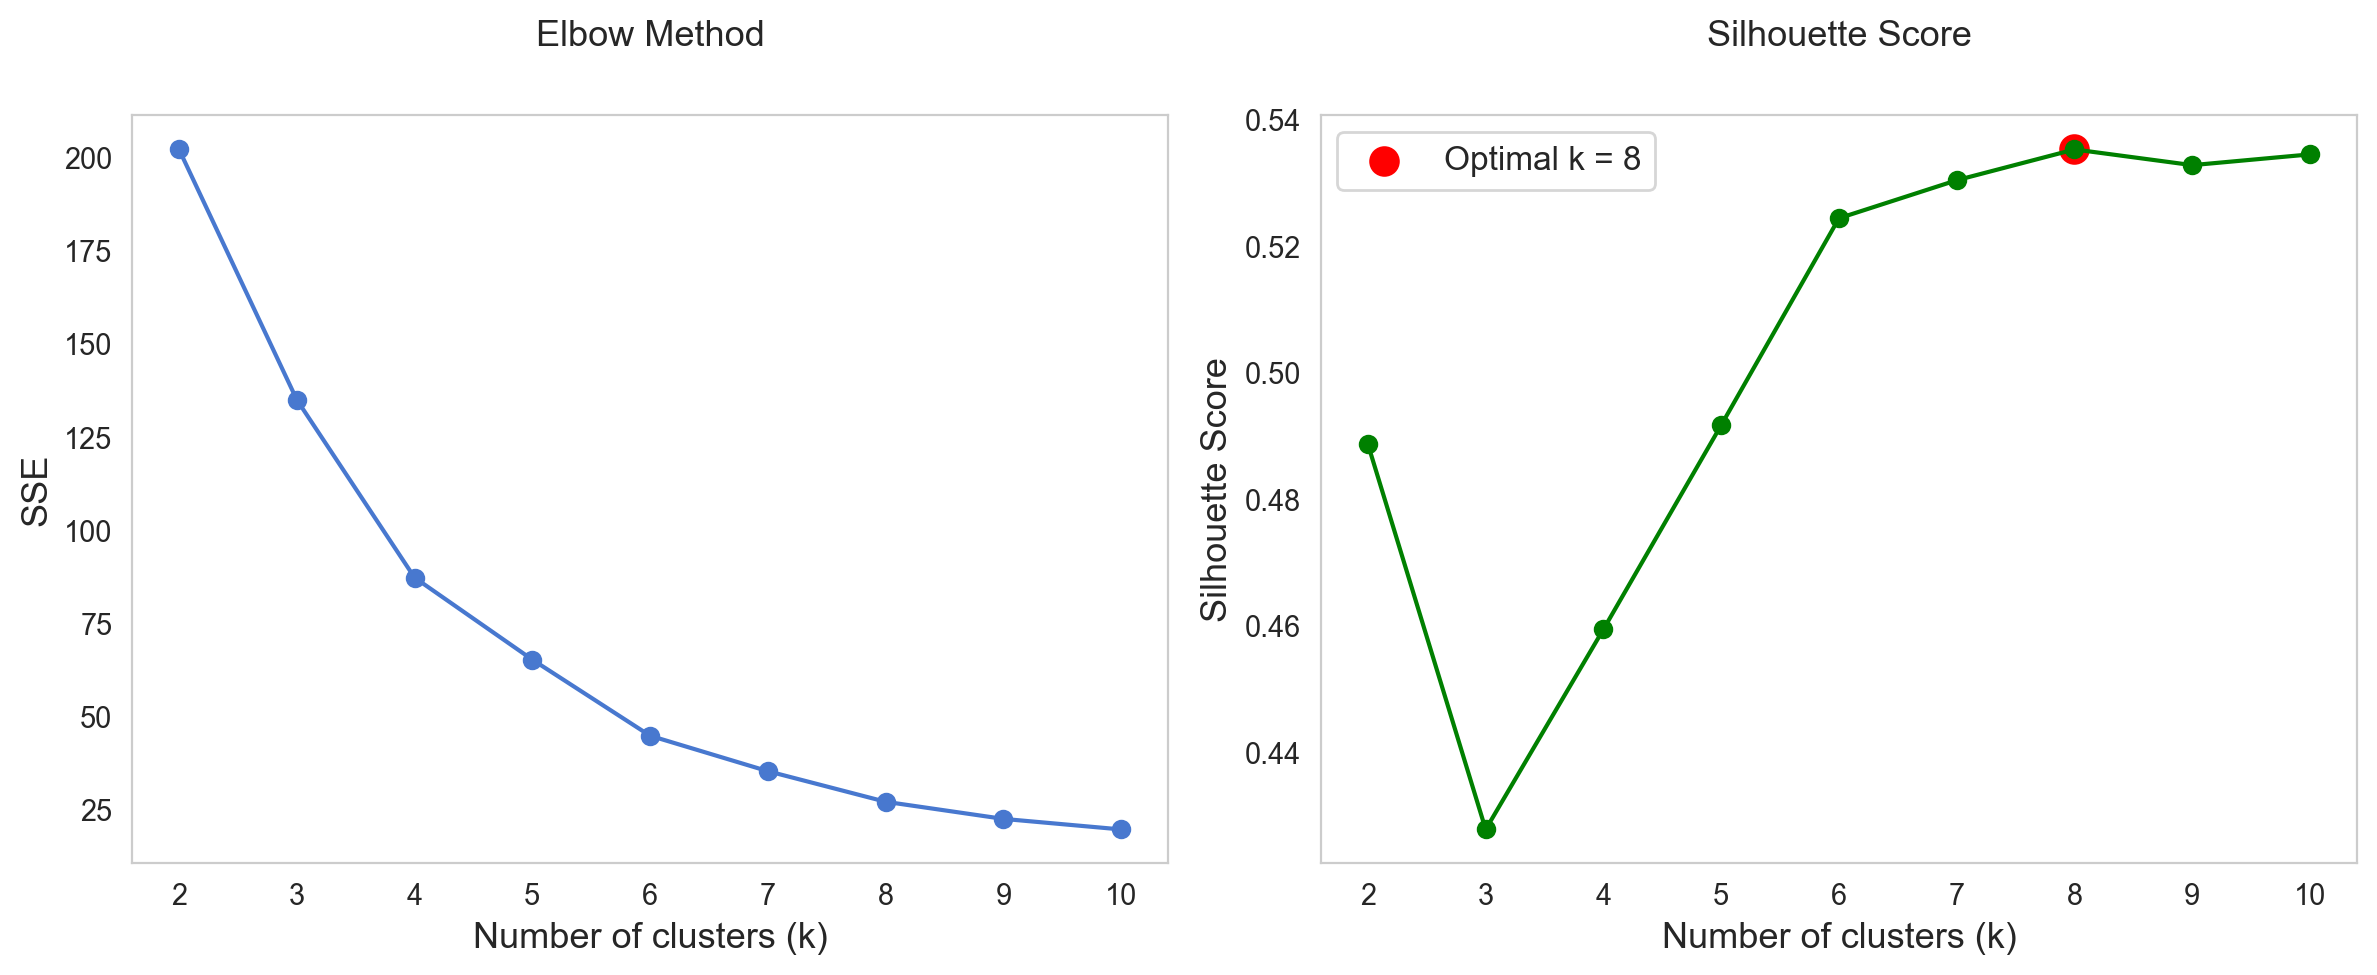

✅ Optimal number of clusters based on silhouette score: 8


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# โหลดข้อมูล
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset3')
X = data.select_dtypes(include='number')

# คำนวณ SSE และ Silhouette Score
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# หาค่า k ที่เหมาะสมที่สุด
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

# วาด Elbow plot และ Silhouette plot
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.scatter(optimal_k, optimal_score, color='red', s=100, label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")


In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=8, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(random_state=42)

Sum of squared errors : 27.092

Centroids : 
[[ 0.522  0.829]
 [ 1.903  0.126]
 [ 0.097  0.154]
 [-0.858  0.444]
 [ 0.583 -0.398]
 [-0.183  0.959]
 [ 1.346 -0.413]
 [ 0.927  0.319]]


In [28]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,0.830586,-0.447733,4
1,0.701678,0.816918,0
2,1.022080,-0.492571,6
3,-0.316765,0.953438,5
4,0.293226,1.057185,0


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

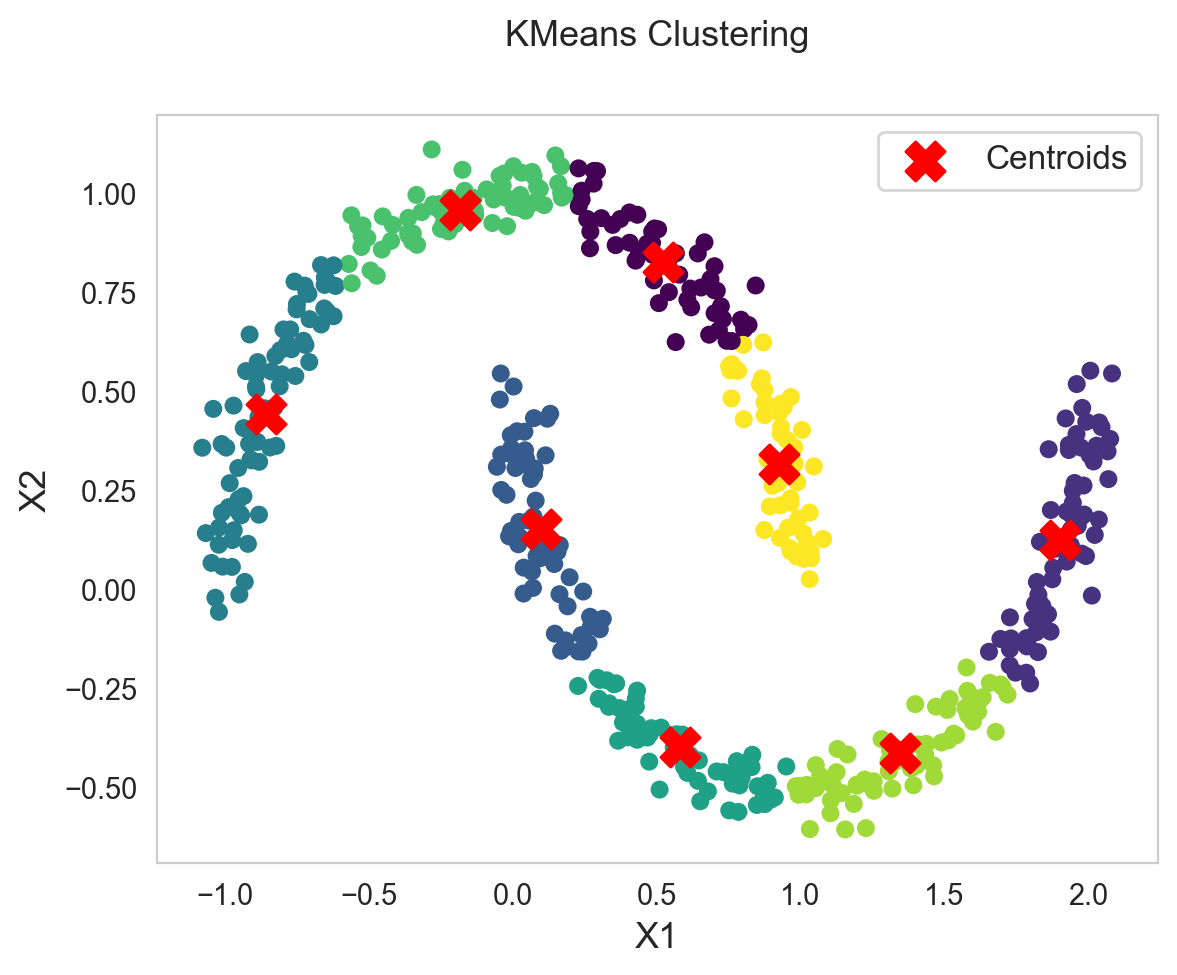

In [29]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 4

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Elbow Method')

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score')

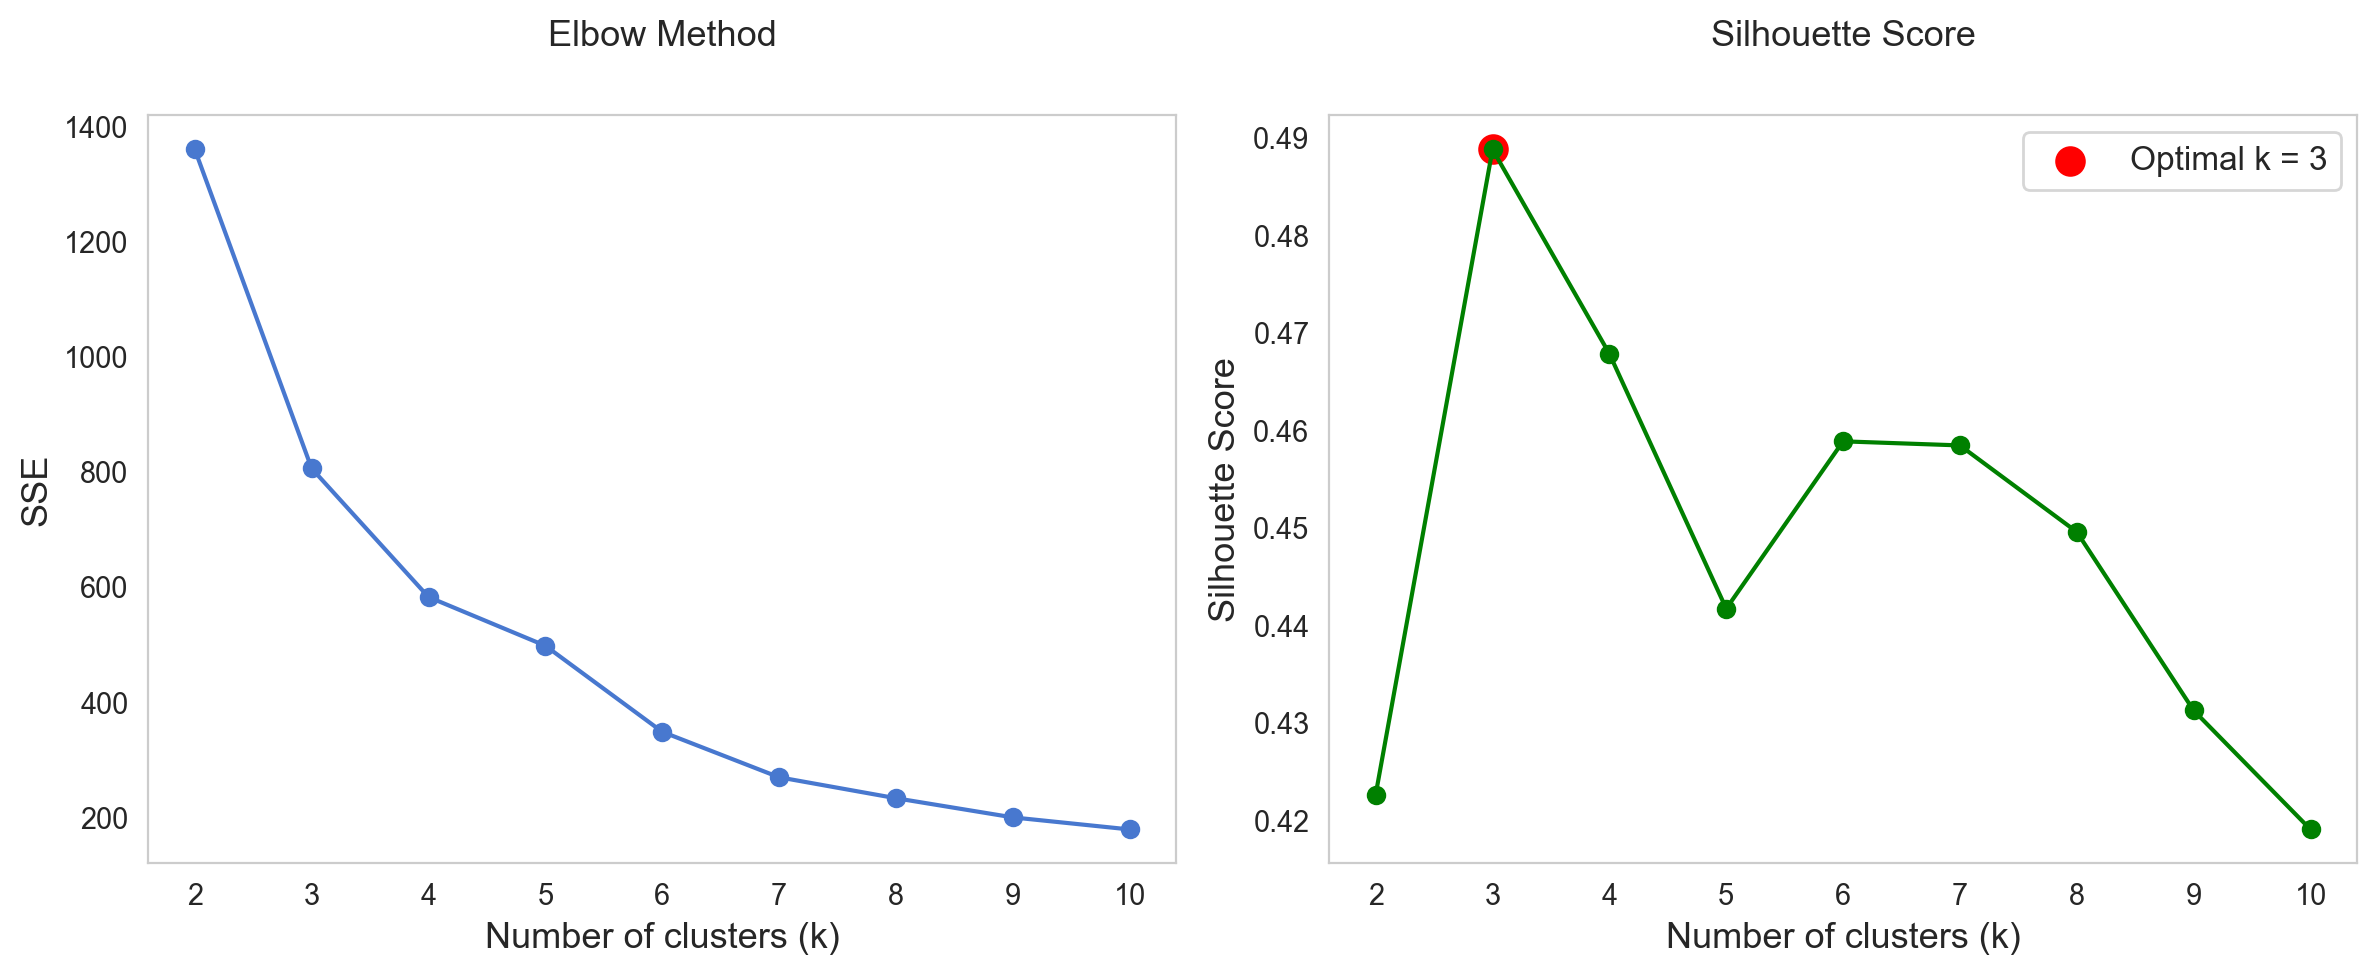

✅ Optimal number of clusters based on silhouette score: 3


In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# โหลดข้อมูล
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset4')
X = data.select_dtypes(include='number')

# คำนวณ SSE และ Silhouette Score
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# หาค่า k ที่เหมาะสมที่สุด
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

# วาด Elbow plot และ Silhouette plot
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.scatter(optimal_k, optimal_score, color='red', s=100, label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")


In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 806.607

Centroids : 
[[ 0.924  0.119]
 [ 0.728 -2.026]
 [-1.218 -1.3  ]]


In [32]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,1.225160,-0.951731,0
1,1.016304,-1.725175,1
2,0.335340,-1.724896,1
3,1.786348,-1.782653,1
4,1.016751,1.062569,0


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

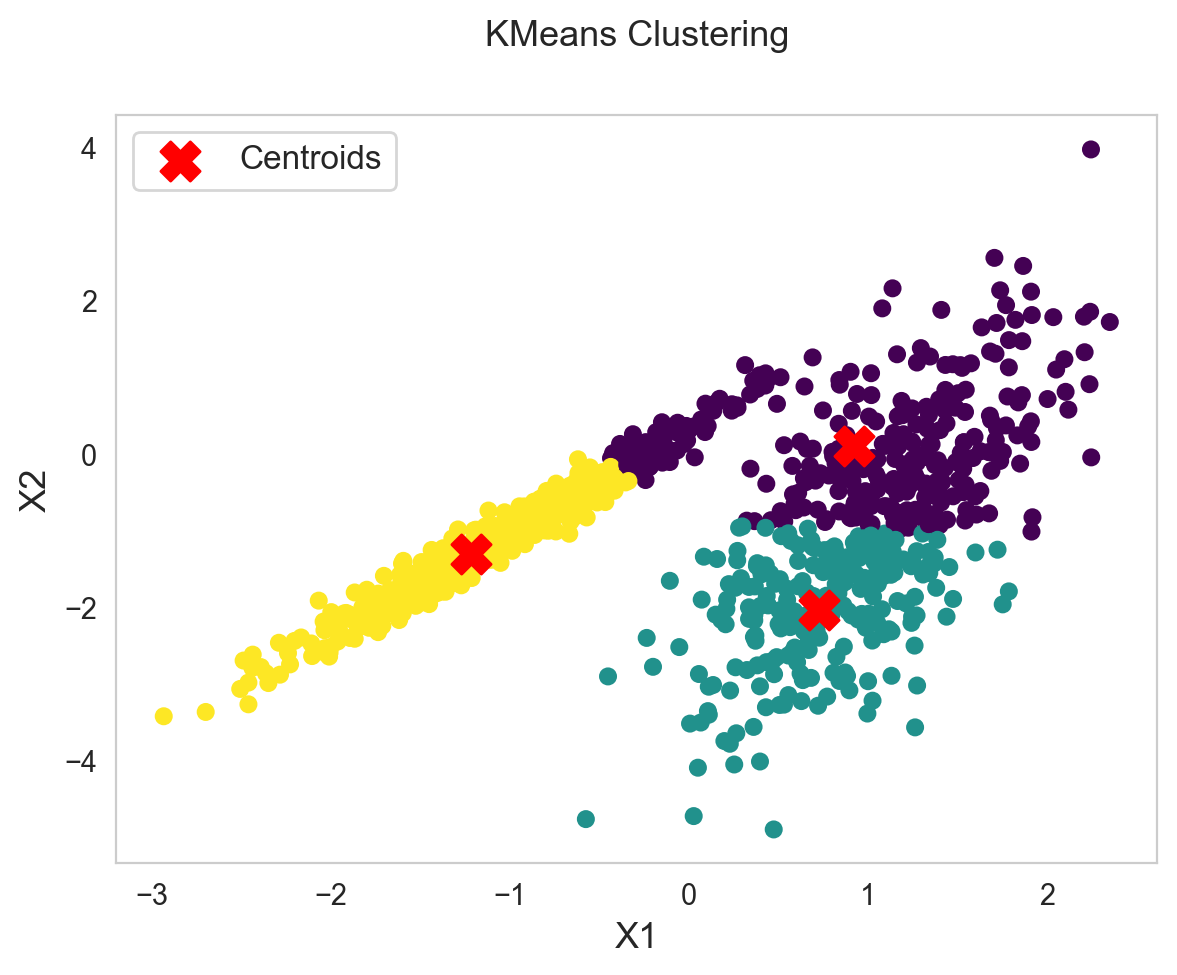

In [33]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


## <font color='darkorange'>Part II: Clustering Wine Data</font>

### Load and scale the dataset

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd

# โหลดข้อมูล
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# สเกลข้อมูลก่อน PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Apply PCA to the data. 

Apply PCA with 8 components

In [ ]:
# ทำ PCA ด้วย 8 components ตามที่โจทย์ระบุ
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

Show the principal components 

In [36]:
# Show the principal components (Loadings)
pc_df = pd.DataFrame(pca.components_, columns=wine.feature_names, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Principal Components (Loadings):")
print(pc_df.round(3))  # Display with 3 decimal places


Principal Components (Loadings):
     alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  total_phenols  \
PC1    0.144      -0.245 -0.002             -0.239      0.142          0.395   
PC2    0.484       0.225  0.316             -0.011      0.300          0.065   
PC3   -0.207       0.089  0.626              0.612      0.131          0.146   
PC4   -0.018       0.537 -0.214              0.061     -0.352          0.198   
PC5   -0.266       0.035 -0.143              0.066      0.727         -0.149   
PC6    0.214       0.537  0.154             -0.101      0.038         -0.084   
PC7   -0.056       0.421 -0.149             -0.287      0.323         -0.028   
PC8    0.396       0.066 -0.170              0.428     -0.156         -0.406   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
PC1       0.423                -0.299            0.313           -0.089   
PC2      -0.003                 0.029            0.039            0.530   
PC3       0.151      

<font color='orange'> **Questions**</font>

Using threshold 0.35 for the loadings,
- What are important features in PC1?
- What are important features in PC2? 

In [37]:
# Threshold for feature importance
threshold = 0.35

# Display important features in PC1 and PC2
important_features_pc1 = [feature for feature, loading in zip(X.columns, pca.components_[0]) if abs(loading) > threshold]
important_features_pc2 = [feature for feature, loading in zip(X.columns, pca.components_[1]) if abs(loading) > threshold]

print("Important features in PC1:", important_features_pc1)
print("Important features in PC2:", important_features_pc2)


Important features in PC1: ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines']
Important features in PC2: ['alcohol', 'color_intensity', 'proline']


# ANS 
Important features in PC1: ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines']
Important features in PC2: ['alcohol', 'color_intensity', 'proline']

Determine PVE by each PC and the cumulative PVE

In [38]:
pve = pca.explained_variance_ratio_

# Calculate cumulative PVE
cumulative_pve = pve.cumsum()

# Create a DataFrame to display PVE and cumulative PVE
pve_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(8)],
    'PVE': pve,
    'Cumulative PVE': cumulative_pve
})

Apply PCA to reduce the data dimension by using the number of PCs that provides at least 80% of the cumulative PVE.

In [39]:
n_components = (cumulative_pve >= 0.80).argmax() + 1
print(f"Number of principal components that explain at least 80% of the variance: {n_components}")

Number of principal components that explain at least 80% of the variance: 5


In [40]:
# Apply PCA with the calculated number of components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X_scaled)

# Show the explained variance ratio for the selected components
print("Explained variance ratio by each selected component:")
print(pca_reduced.explained_variance_ratio_)

# Show the cumulative explained variance
print(f"Cumulative explained variance: {cumulative_pve[n_components - 1]:.4f}")

Explained variance ratio by each selected component:
[0.362 0.192 0.111 0.071 0.066]
Cumulative explained variance: 0.8016


### Applying clustering to PC scores 
When the original data is high-dimensional, 
- clustering PC scores could significantly save memory and time. 
- clustering is easier to visualize by looking at the first few PCs.

Fit K-means with the optimal number of clusters

In [41]:
# หา k ที่เหมาะสมด้วย Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# เลือกจำนวน cluster ที่ดีที่สุด
best_k = range(2, 10)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {best_k}")

# สร้าง K-means clustering ด้วย k ที่ดีที่สุด
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = final_kmeans.fit_predict(X_pca)

Optimal number of clusters (k): 3


### Visualize the clustering 

<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA (8 components) + K-means clustering (k=3)')

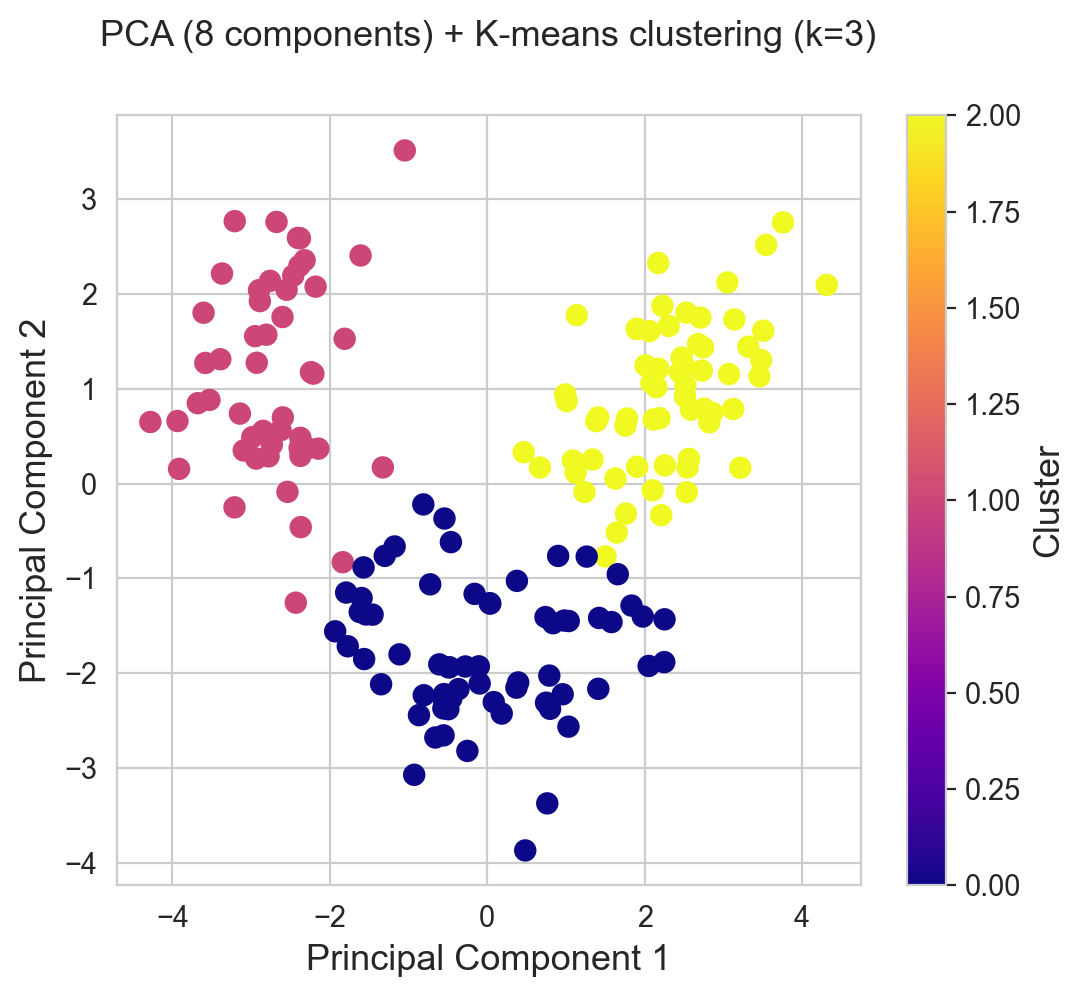

In [42]:
# แสดงผล clustering ด้วย PC1 และ PC2
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA (8 components) + K-means clustering (k={best_k})")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


### Insights from the clustering

Compute the average of variables in the original scale of each cluster. 

In [13]:
# Revert the PCA-transformed data to the original scale
X_reconstructed = pca.inverse_transform(X_pca)

# Convert the reconstructed data back to a DataFrame with original feature names
X_reconstructed_df = pd.DataFrame(X_reconstructed, columns=X.columns)

# Add the cluster labels to the DataFrame
X_reconstructed_df['Cluster'] = clusters

# Compute the average of variables in their original scale for each cluster
average_per_cluster = X_reconstructed_df.groupby('Cluster').mean()
# Display the result
print(average_per_cluster)

          alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
Cluster                                                                 
0       -0.941795   -0.396900 -0.493604           0.172579  -0.497148   
1        0.165732    0.856410  0.180036           0.531931  -0.073073   
2        0.851039   -0.288361  0.369394          -0.618486   0.581311   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0            -0.093660    0.022088             -0.032082         0.063362   
1            -1.026768   -1.184555              0.742257        -0.775437   
2             0.942791    0.951235             -0.576931         0.571431   

         color_intensity       hue  od280/od315_of_diluted_wines   proline  
Cluster                                                                     
0              -0.907427  0.446708                      0.280316 -0.724253  
1               0

Determine the cluster prototype

In [14]:
# Get the centroids (cluster prototypes) in the PCA space
centroids_pca = kmeans.cluster_centers_

# Inverse transform the centroids back to the original space
centroids_original = pca.inverse_transform(centroids_pca)

# Convert the centroids back to a DataFrame for easy interpretation
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
print("Cluster Prototypes (Centroids in Original Space):")
print(centroids_df)

Cluster Prototypes (Centroids in Original Space):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.362169   -1.229800 -1.068648          -0.748709  -0.686431   
1  0.420718   -0.442212  1.515134           0.482223   1.147508   
2 -0.201907    0.639696 -0.105578           0.152020  -0.137648   
3  1.589139   -0.628413  0.239671          -1.256912   0.530576   
4  0.719329    0.255721  0.092813          -0.816031   0.782188   
5 -0.981956   -0.317509 -0.449619           0.291705  -0.754965   
6 -1.125120   -0.322036 -1.533256          -0.687925   2.751471   
7  0.514635    0.908942  0.499064           0.862399   0.111036   
8  0.893263   -0.408015 -0.068370          -0.773158  -0.132277   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       1.065176    1.097780             -1.163859         1.058100   
1       0.727420    0.787554             -0.197586         0.255534   
2      -1.127368   -1.219393              0.832001        -1.20342

### Look at key variables from clustering by using feature importance in decision tree

Feature Importances:
                         Feature  Importance
12                       proline    0.395485
11  od280/od315_of_diluted_wines    0.341860
6                     flavanoids    0.113341
9                color_intensity    0.061944
1                     malic_acid    0.050823
2                            ash    0.019897
0                        alcohol    0.016649
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


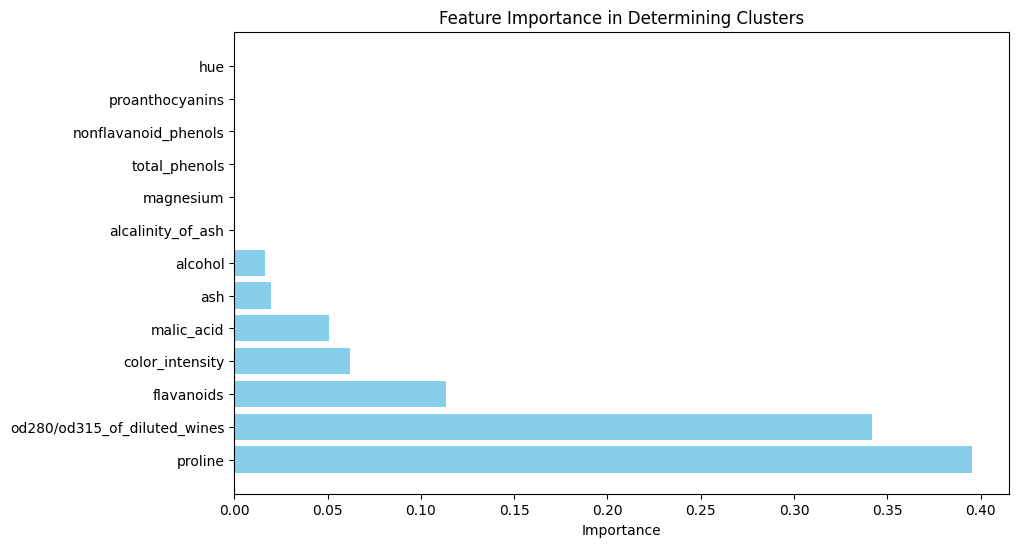

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Train a Decision Tree to predict clusters
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_scaled, clusters)

# Get feature importance from the decision tree
feature_importance = tree.feature_importances_

# Create a DataFrame to view the importance of each feature
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Determining Clusters')
plt.show()


<font color='orange'> **Question** </font> What are the three most important features that contribute to the clustering?

1# roline, 2# od280/od315_of_diluted_wines,3# flavanoids 